In [1]:
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl
import numpy as np
from numpy import genfromtxt
import pandas as pd
import datetime
import seaborn as sns
from scipy.stats import pearsonr
import itertools
from scipy.interpolate import make_interp_spline, BSpline
from scipy.interpolate import interp1d
from matplotlib.patches import ConnectionPatch

In [2]:
drive_loc = 'data/'

In [3]:
data = pd.read_csv(drive_loc + '20160101-20160101_allSinFits.csv',index_col=0)

In [4]:
data

,T_hr,amplitude_km,phase_hr,offset_km,slope_kmph,r2,T_hr_guess,selected
2016-01-01,3.082767,26.980678,-3.442991,-50.801071,2.554895,0.788668,3.5,True
2016-01-01,3.082746,26.980623,-3.443094,-50.799620,2.554813,0.788668,4.0,False
2016-01-01,3.082770,26.980685,-0.360206,-50.801281,2.554907,0.788668,3.0,False
2016-01-01,3.082742,26.980615,5.805117,-50.799380,2.554799,0.788668,2.5,False
2016-01-01,3.082740,26.980607,11.970572,-50.799176,2.554788,0.788668,2.0,False
...,...,...,...,...,...,...,...,...
2023-12-31,3.189671,31.404883,10.749807,11.877615,-0.809600,0.665640,2.0,False
2023-12-31,3.189669,31.404891,4.370448,11.877643,-0.809602,0.665640,2.5,False
2023-12-31,3.189665,31.404887,1.180754,11.877417,-0.809591,0.665640,3.0,False
2023-12-31,1.130200,11.643463,2.305937,-53.252065,2.633757,0.117416,1.0,False


In [5]:
df = data[data['selected']==True]
df.index = pd.to_datetime(df.index)

In [6]:
df_2016 = df.loc['2016-01-01':'2016-12-31']
df_2017 = df.loc['2017-01-01':'2017-12-31']
df_2018 = df.loc['2018-01-01':'2018-12-31']
df_2019 = df.loc['2019-01-01':'2019-12-31']
df_2020 = df.loc['2020-01-01':'2020-12-31']
df_2021 = df.loc['2021-01-01':'2021-12-31']
df_2022 = df.loc['2022-01-01':'2022-12-31']
df_2023 = df.loc['2023-01-01':'2023-12-31']
df_2022

,T_hr,amplitude_km,phase_hr,offset_km,slope_kmph,r2,T_hr_guess,selected
2022-01-01,1.901908,44.168416,-7.270311,-68.887375,3.608090,0.638139,3.5,True
2022-01-02,1.614518,20.357285,0.804503,20.108624,-1.093439,0.398231,1.5,True
2022-01-03,4.877863,16.665570,7.167203,-41.808247,2.211759,0.495176,3.5,True
2022-01-04,3.405631,36.080927,-4.077363,7.591203,-0.635059,0.526338,4.0,True
2022-01-05,4.014855,37.976093,1.903274,-8.981901,0.717738,0.538758,4.0,True
...,...,...,...,...,...,...,...,...
2022-12-27,2.301109,34.211920,5.370406,-83.977122,4.375234,0.442759,2.0,True
2022-12-28,3.265200,21.674661,-3.974429,-3.158778,0.101296,0.730405,4.0,True
2022-12-29,3.710281,25.134711,2.179114,-42.041344,2.000081,0.427825,3.0,True
2022-12-30,2.278486,9.870690,2.901654,-24.825066,1.250122,0.578206,2.0,True


In [7]:
years = df.index.year.unique()

# Initialize an empty list to store DataFrames
df_list = []

# Loop through each year and slice the DataFrame
for year in years:
    df_year = df.loc[df.index.year == year]
    df_list.append(df_year)

/tmp/ipykernel_162641/350589345.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_amplitude = df_year.resample('M').mean()['amplitude_km']


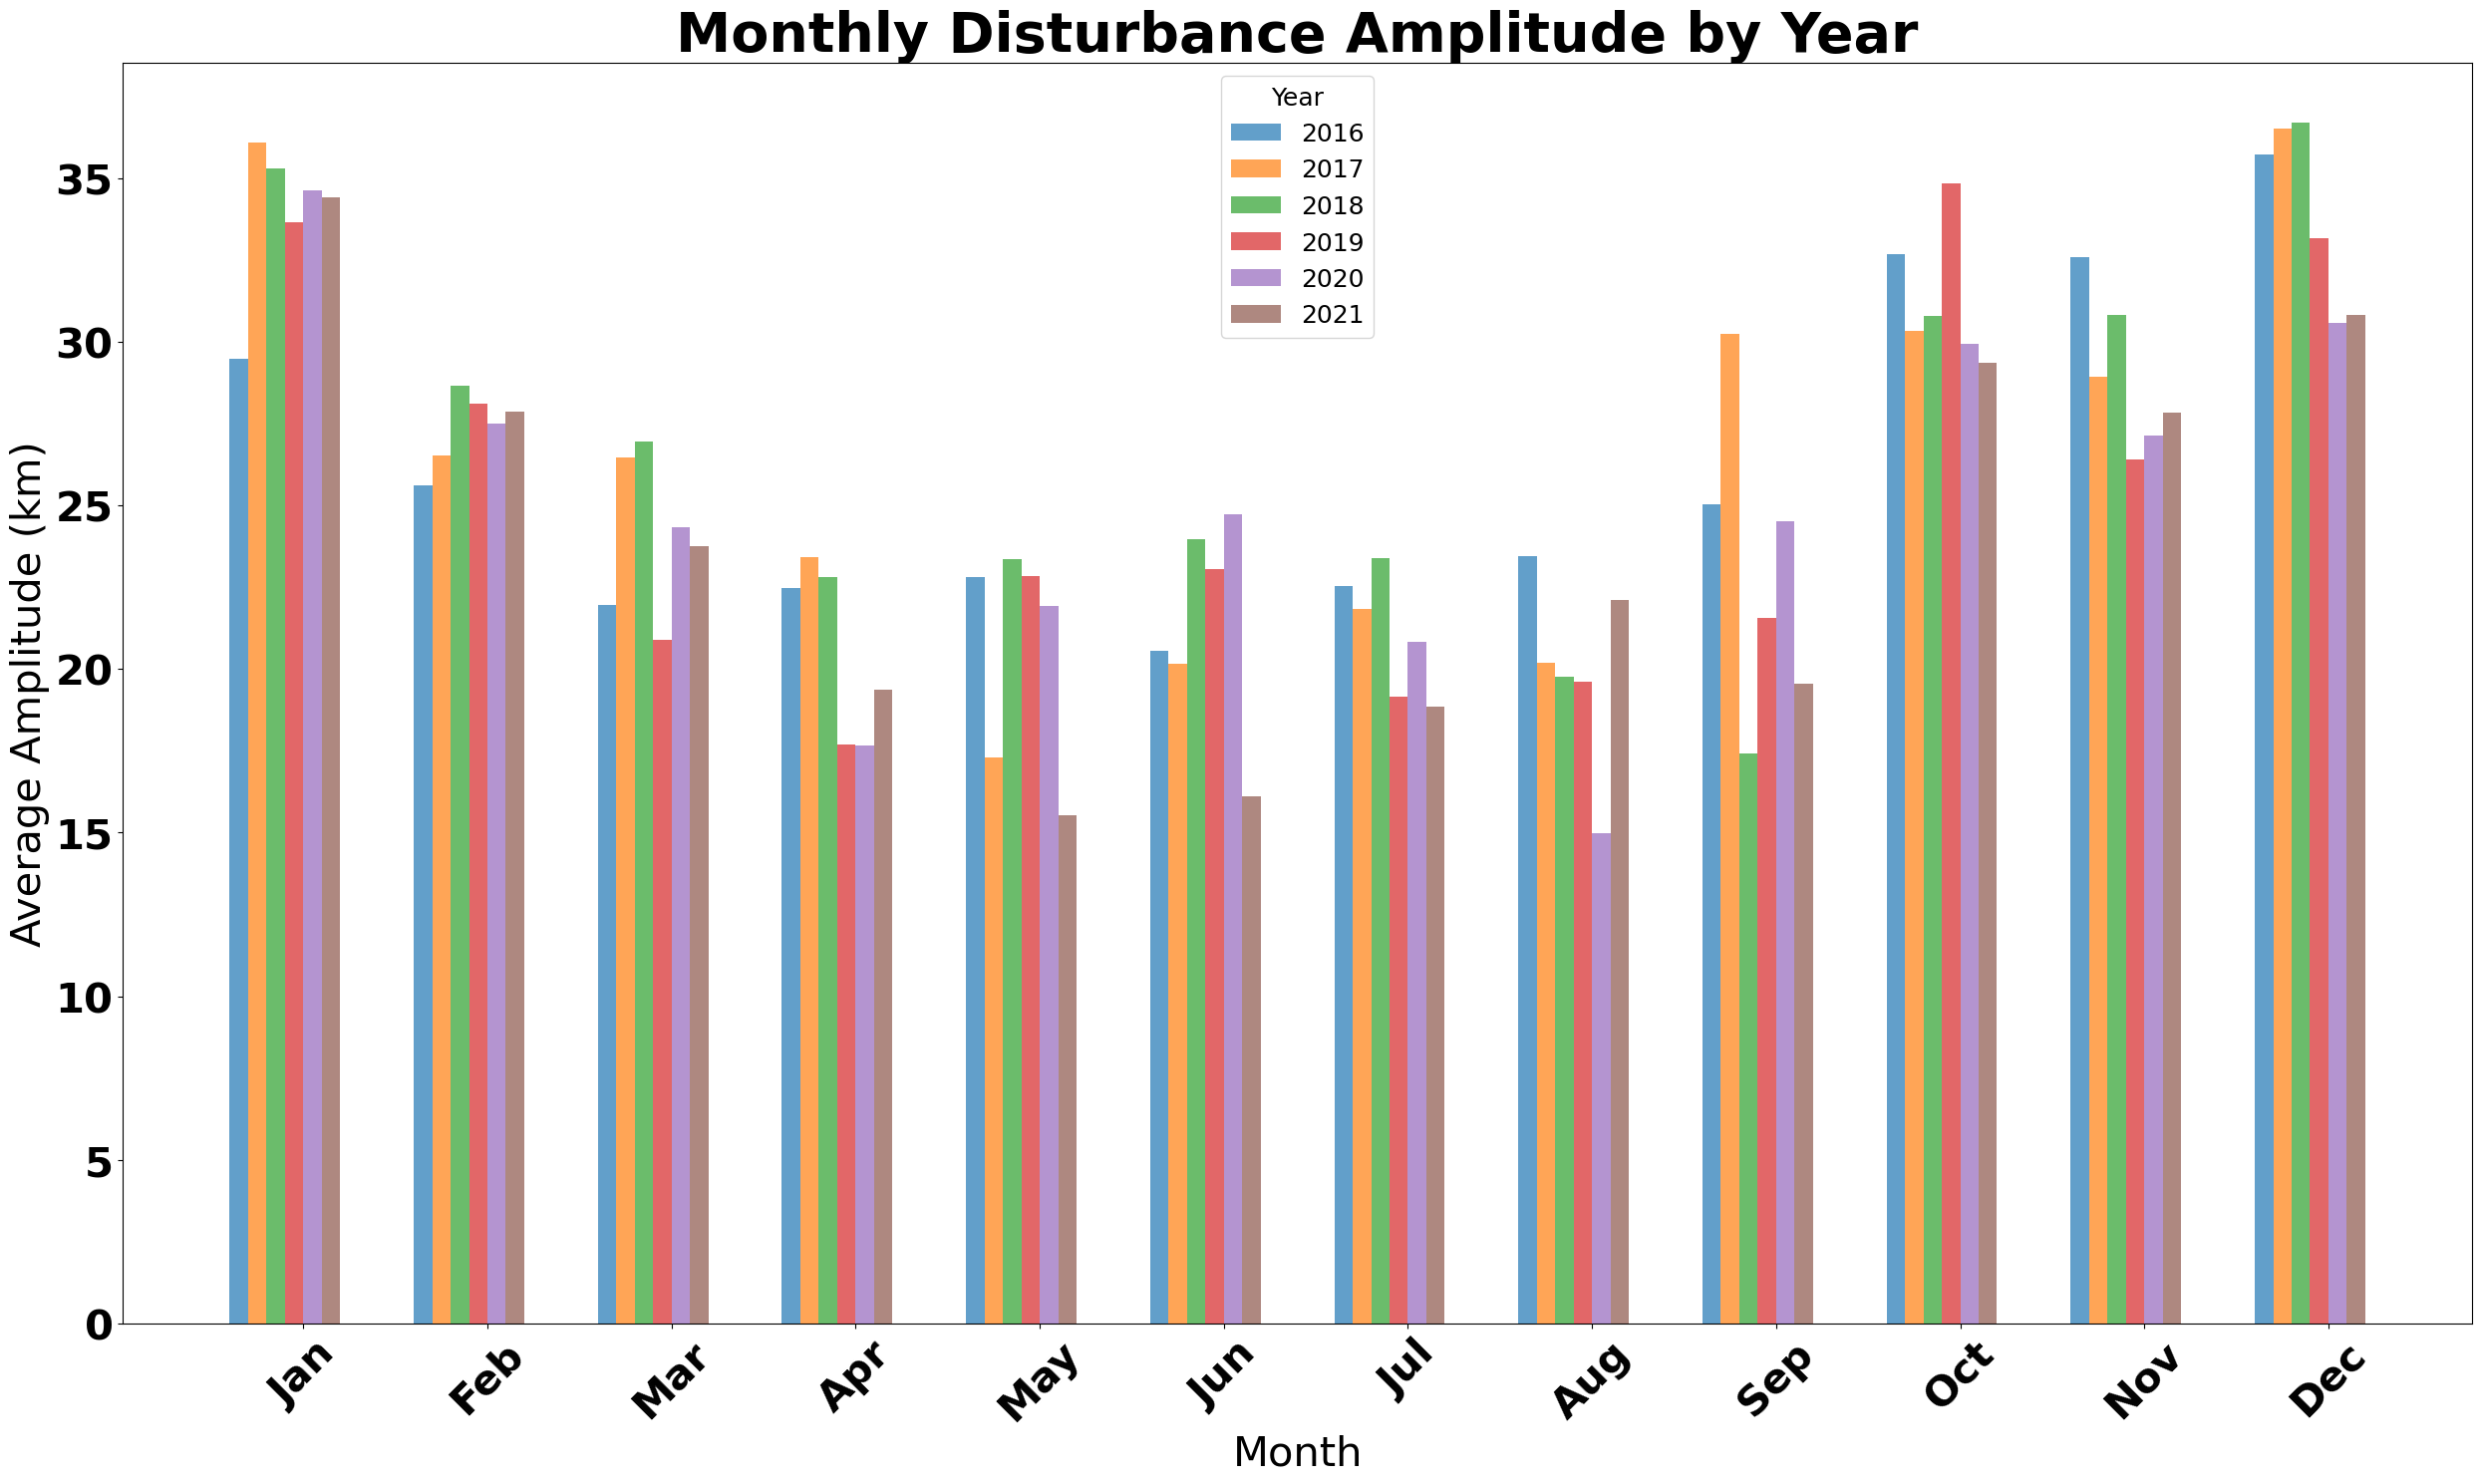

In [8]:
n = 12
index = np.arange(n)
width = 0.4
xLabel = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(25, 15))

n_years = len(years)

bar_width = 0.8 / n_years

for i, year in enumerate(years):

    if year == 2022:
        continue
    if year == 2023:
        continue
    x_pos = index + i * bar_width
    df_year = df_list[i]
    monthly_amplitude = df_year.resample('M').mean()['amplitude_km']
    plt.bar(x_pos, monthly_amplitude, width=bar_width, label=f'{year}', alpha=0.7)

plt.xlabel('Month', fontsize=30)
plt.ylabel('Average Amplitude (km)', fontsize=30)
plt.title('Monthly Disturbance Amplitude by Year', fontsize=40, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')
plt.legend(title='Year', fontsize=18, title_fontsize='18')
plt.xticks(index + bar_width * (n_years / 2) - bar_width / 2, xLabel, rotation=45, fontsize=30, fontweight='bold')
plt.tight_layout()


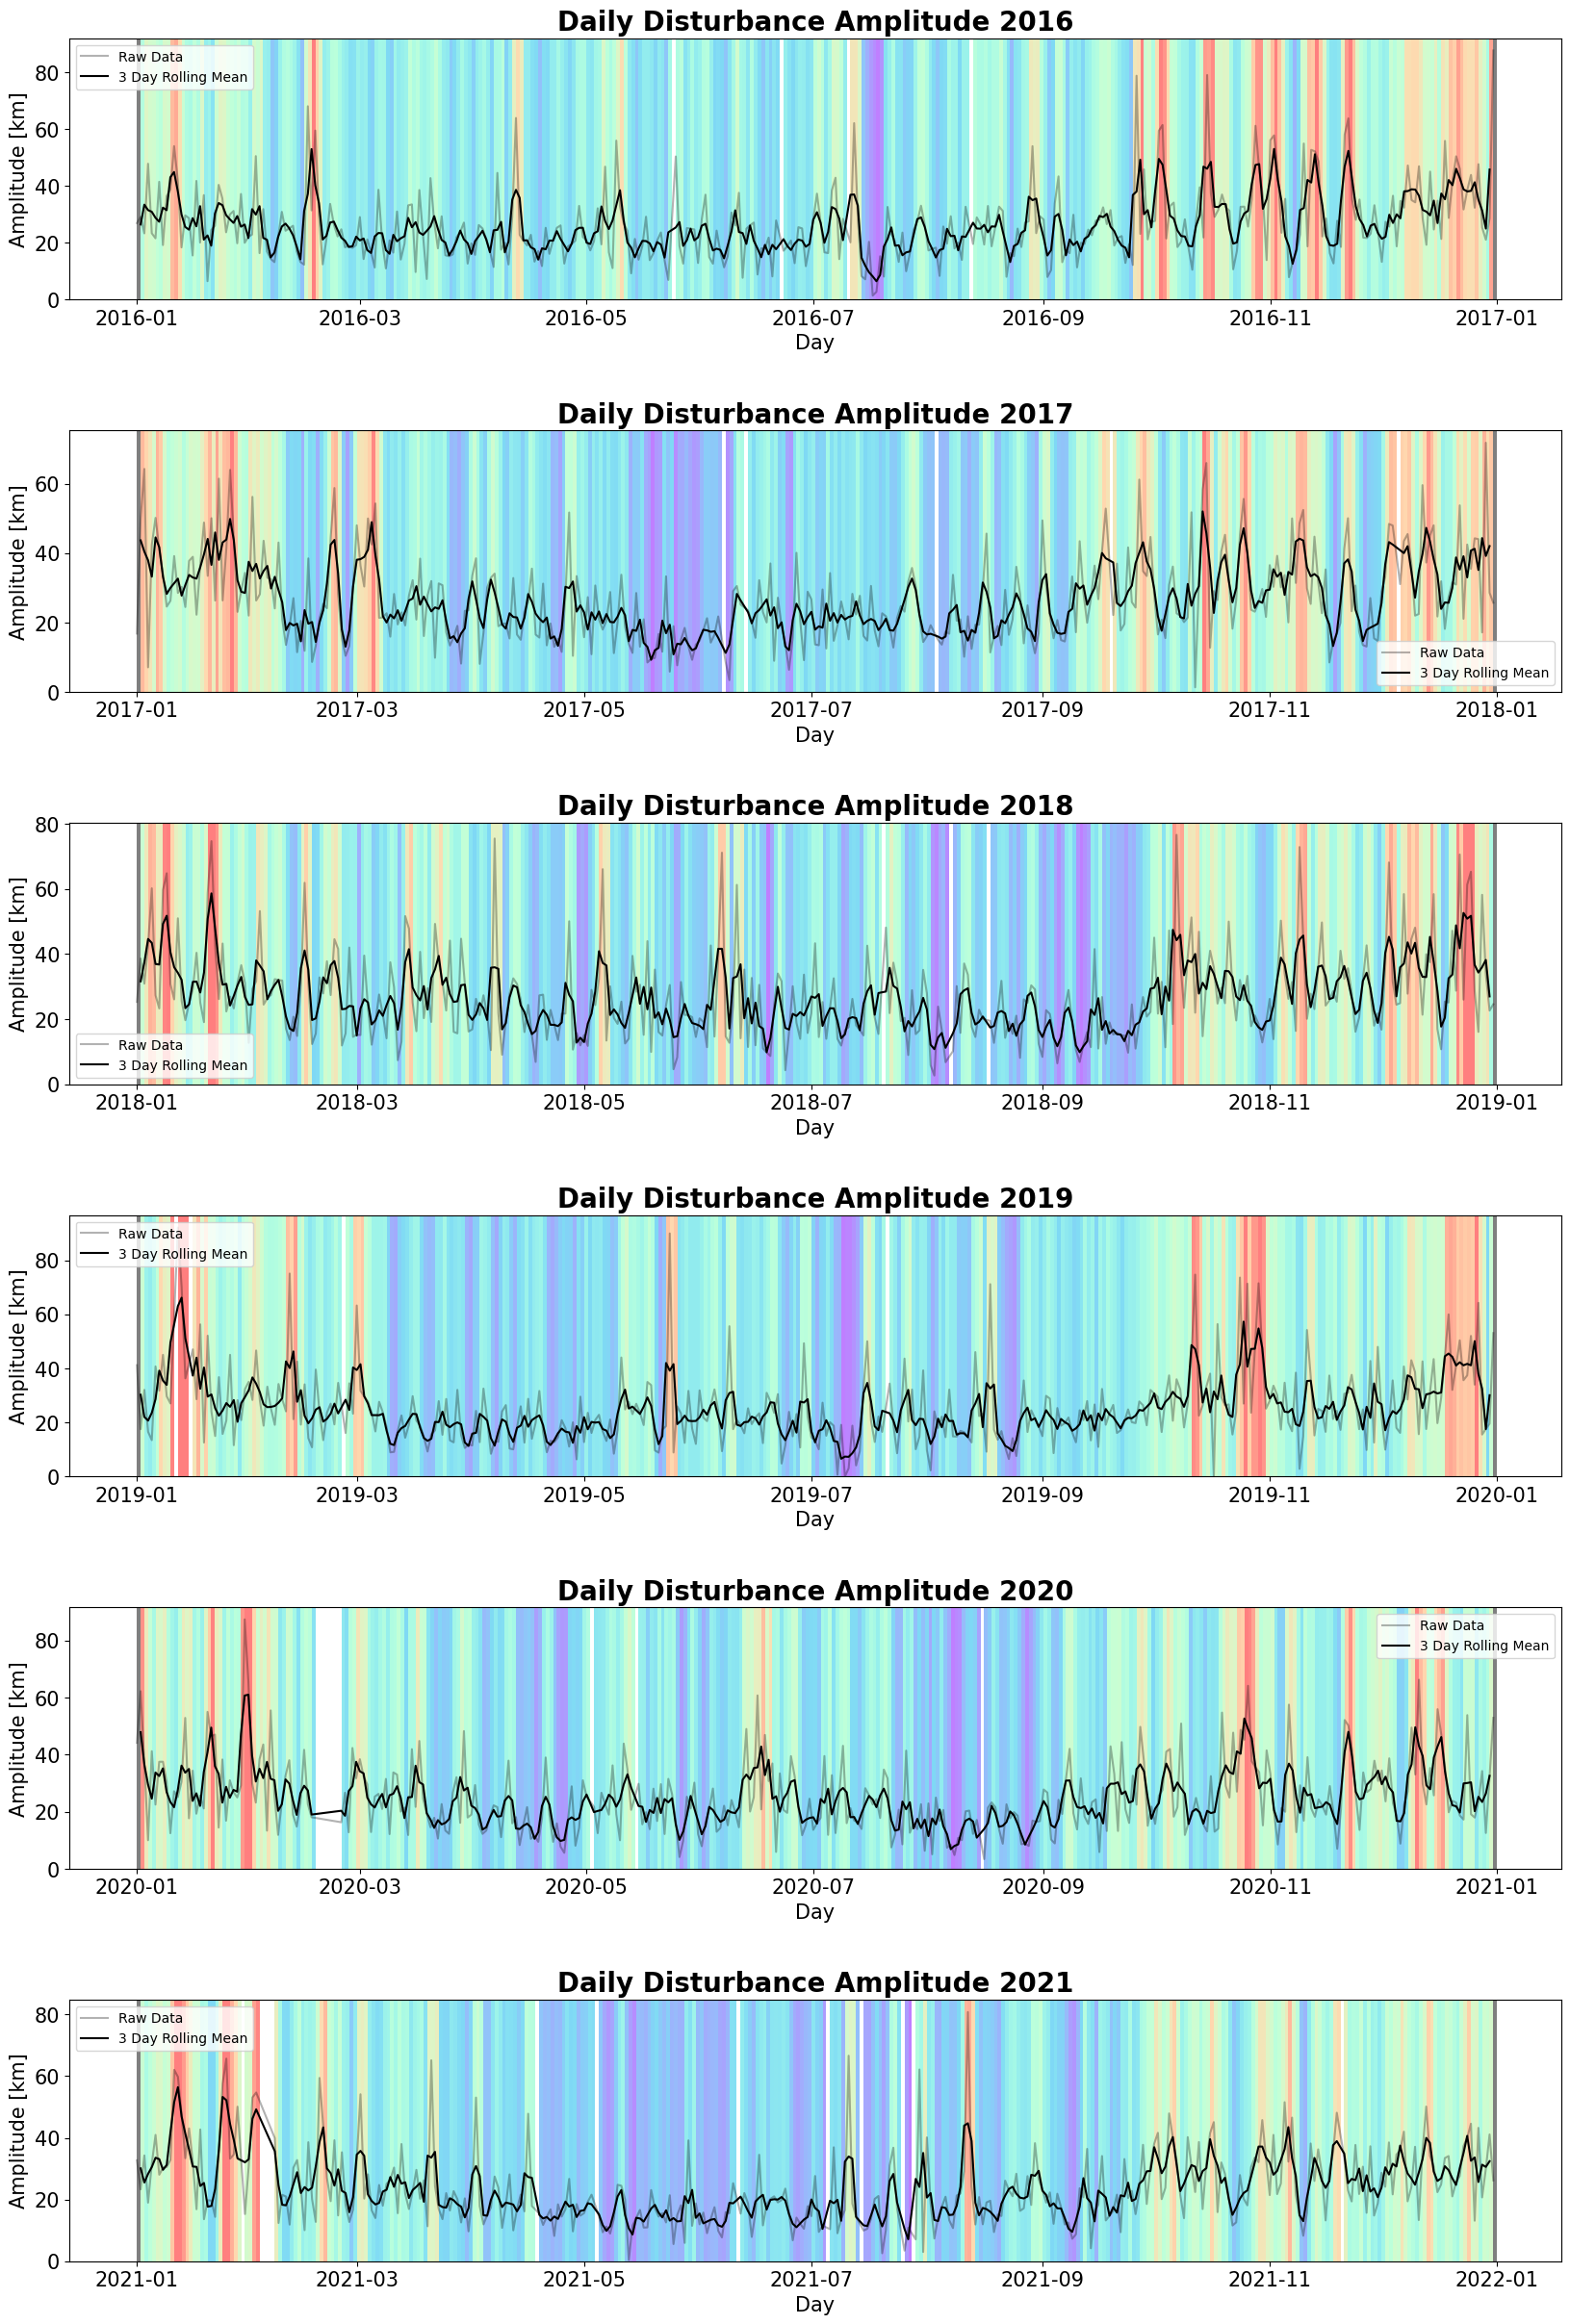

In [9]:

fig, axs = plt.subplots(n_years-2,1,figsize=(20,30)) 
plt.subplots_adjust(hspace=0.5)

for i, year in enumerate(years):

    if year == 2022:
        continue
    if year == 2023:
        continue
    T_hr_cmap       = 'rainbow'
    df_year         = df_list[i]
    vmin            = np.nanmin(df_year['amplitude_km'].rolling(3,center=True).mean())
#    vmax            = np.nanmax(df_year['amplitude_km'].rolling(3,center=True).mean())
    vmax            = 50
#    vmin            = 10
    
    cmap            = mpl.colormaps.get_cmap(T_hr_cmap)
    norm            = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
    mpbl            = mpl.cm.ScalarMappable(norm,cmap)
    color           = mpbl.to_rgba(df_year['amplitude_km'].rolling(3,center=True).mean())

    axs[i].plot(df_year.index, df_year['amplitude_km'], color = 'black',alpha=0.3,label='Raw Data')
    axs[i].plot(df_year.index, df_year['amplitude_km'].rolling(3,center=True).mean(), color='black', label='3 Day Rolling Mean')
    axs[i].scatter(df_year.index,df_year['amplitude_km'].rolling(3,center=True).mean(),marker='o',c=color,alpha=0)
    trans           = mpl.transforms.blended_transform_factory( axs[i].transData, axs[i].transAxes)
    axs[i].bar(df_year.index,1,width=1,color=color,align='edge',zorder=-1,transform=trans,alpha=0.5)
    axs[i].set_title(f'Daily Disturbance Amplitude {year}', fontsize = 20,fontweight = 'bold')
    axs[i].set_ylabel('Amplitude [km]',fontsize = 15)
    axs[i].set_xlabel('Day',fontsize = 15)
    axs[i].tick_params(labelsize = 15)
    axs[i].legend()

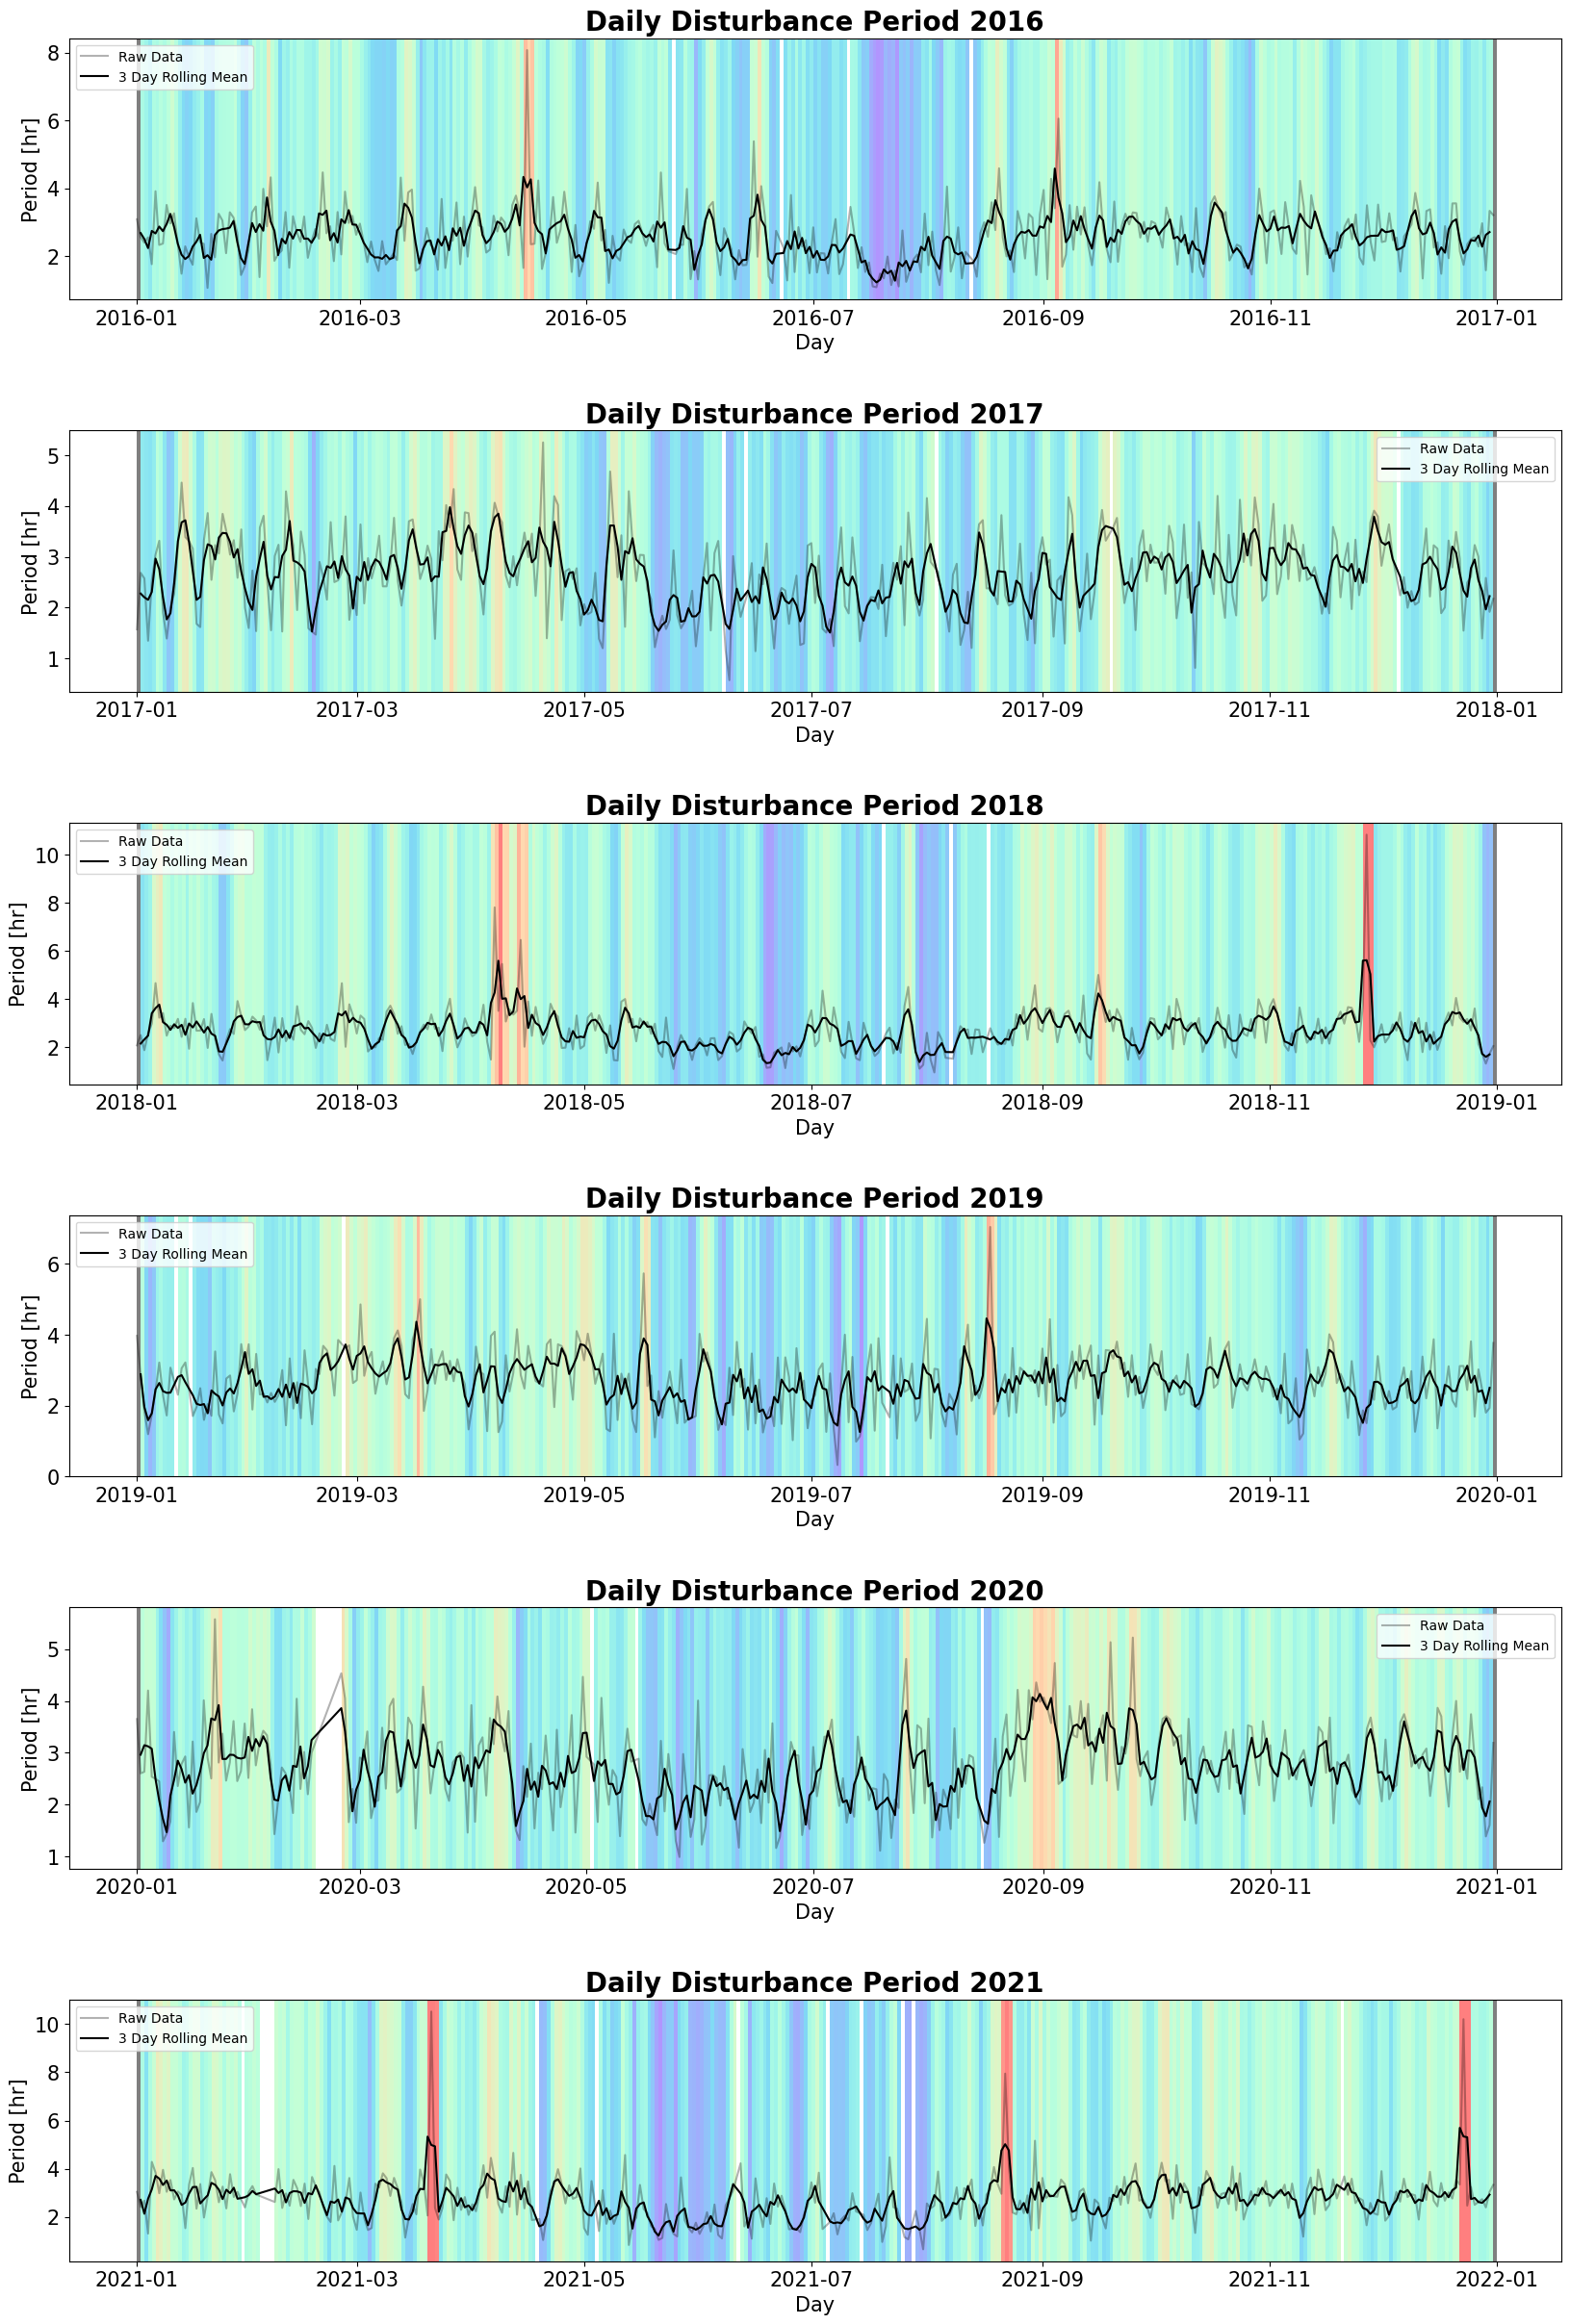

In [10]:
fig, axs = plt.subplots(n_years-2,1,figsize=(20,30)) 
plt.subplots_adjust(hspace=0.5)

for i, year in enumerate(years):

    if year == 2022:
        continue
    if year == 2023:
        continue
    param           = 'T_hr'
    T_hr_cmap       = 'rainbow'
    df_year         = df_list[i]
#    vmin            = np.nanmin(df_year[param ].rolling(3,center=True).mean())
#    vmax            = np.nanmax(df_year[param ].rolling(3,center=True).mean())
    vmax            = 5
    vmin            = 1
    
    cmap            = mpl.colormaps.get_cmap(T_hr_cmap)
    norm            = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
    mpbl            = mpl.cm.ScalarMappable(norm,cmap)
    color           = mpbl.to_rgba(df_year[param ].rolling(3,center=True).mean())

    axs[i].plot(df_year.index, df_year[param ], color = 'black',alpha=0.3, label='Raw Data')
    axs[i].plot(df_year.index, df_year[param].rolling(3,center=True).mean(), color='black', label='3 Day Rolling Mean')
    axs[i].scatter(df_year.index,df_year[param].rolling(3,center=True).mean(),marker='o',c=color,alpha=0)
    trans           = mpl.transforms.blended_transform_factory( axs[i].transData, axs[i].transAxes)
    axs[i].bar(df_year.index,1,width=1,color=color,align='edge',zorder=-1,transform=trans,alpha=0.5)
    axs[i].set_title(f'Daily Disturbance Period {year}', fontsize = 20,fontweight = 'bold')
    axs[i].set_ylabel('Period [hr]',fontsize = 15)
    axs[i].set_xlabel('Day',fontsize = 15)
    axs[i].tick_params(labelsize = 15)
    axs[i].legend()